In [1]:
from utility import *
from supportkit import *
import numpy as np
from matplotlib import pyplot as plt
from sympy import sqrt, I
i = I # imaginary number unit

### simulated histograme for testing

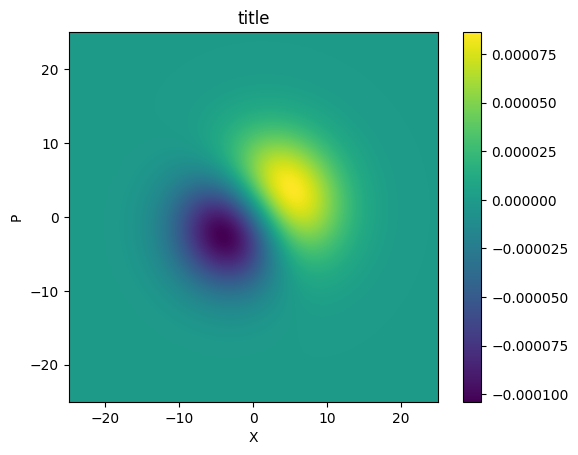

In [2]:
# use gaussian as simulated measurement result, might be physicall impossible
D_S, S = generate_2d_gaussian(
    means=[0.15, 0.1],
    sigmas=[5.71, 5.72],
    ranges=(25, 25)
)
D_h, S = generate_2d_gaussian(
    means=[0, 0],
    sigmas=[5.7, 5.7],
    ranges=(25, 25)
)
plot_complex_2dfunc(D_S - D_h, S)

In [3]:
# compute moment from histograme D_S (signal), D_h (reference)
moments = eva_qubit_moments(S, D_S, D_h, G=1.0, highest_order=4)
moments

{'a00': 1,
 'a10': np.complex128(0.149960933750501-0.0999732172482014j),
 'a01': np.complex128(0.149960933750501+0.0999732172482014j),
 'a20': np.complex128(-0.10155024021567995-0.02998487350314609j),
 'a11': np.complex128(0.3740119672745692-1.0122637165387806e-19j),
 'a02': np.complex128(-0.10155024021567995+0.02998487350314609j),
 'a30': np.complex128(-0.07116464284610484+0.015585264970141193j),
 'a21': np.complex128(0.07193781481362649-0.07037600725708337j),
 'a12': np.complex128(0.07193781481362294+0.07037600725706561j),
 'a03': np.complex128(-0.07116464284610484-0.015585264970141193j),
 'a40': np.complex128(-0.4326172358715574+0.01953759891076456j),
 'a31': np.complex128(0.013007777469056236-0.024230152521558246j),
 'a22': np.complex128(-0.15971629648265662+2.0224745513193827e-17j),
 'a13': np.complex128(0.013007777469056236+0.024230152521518278j),
 'a04': np.complex128(-0.4326172358715574-0.01953759891076456j)}

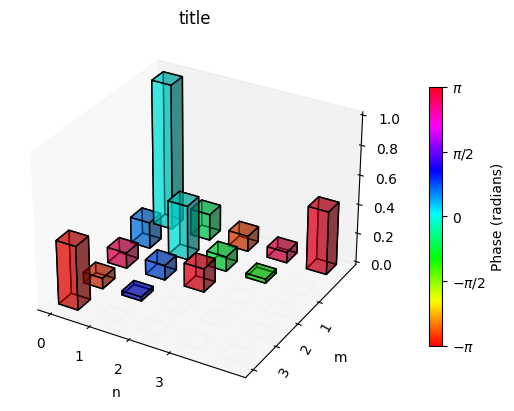

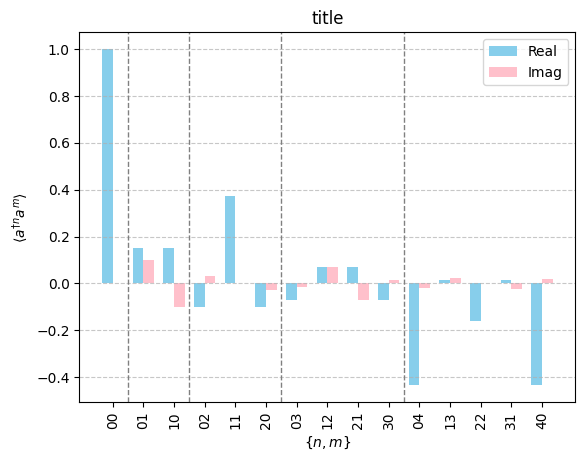

In [4]:
# plot moment
plot_moments_bar_diagram(moments)
plot_moments_bar_diagram_flat(moments, highest_order=4)

In [5]:
# Construct winger function from given moments
lambd = generate_complex_2dcoord(5, 51)
W = get_winger_function_func(moments, lambd, highest_order=6)
alpha = generate_complex_2dcoord(2, 151)
W_values = W(alpha)

# Winger Log Negativity
wln = np.log(approx_complex_2dint(np.abs(W_values), alpha)) 
print('WLN:', wln)

WLN: 0.021625698665662257


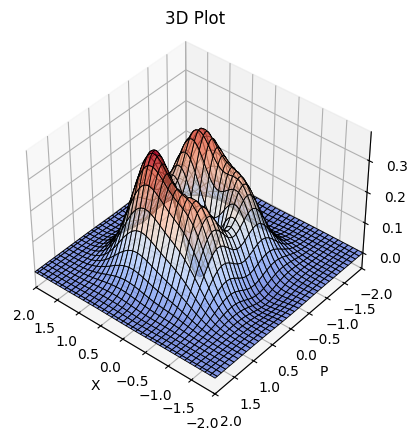

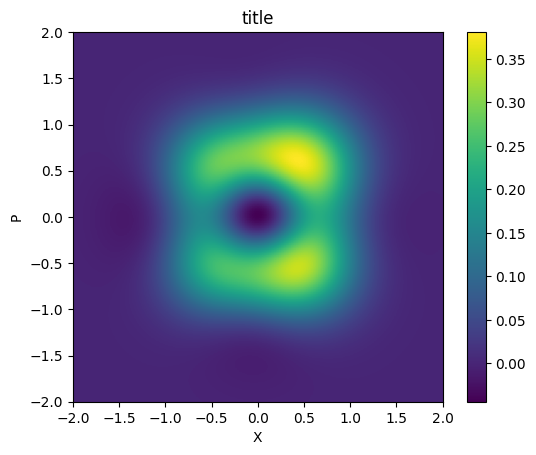

In [6]:
# plot winger function
plot_complex_2dfunc_in3d(W_values, alpha, elev=40, azim=130)
plot_complex_2dfunc(W_values, alpha)

In [7]:
# use Maxima Likelihood Estimation to fit density matrix
rho = mle_density_matrix(moments, dim=4)
rho

array([[ 0.63542202+2.14999529e-17j,  0.10223431-5.64650651e-02j,
        -0.05008766-1.02746294e-02j, -0.02315832+5.09565230e-03j],
       [ 0.10223431+5.64650651e-02j,  0.35383031-2.18470947e-17j,
         0.02832373-3.09261141e-02j, -0.00357317-7.23766863e-03j],
       [-0.05008766+1.02746294e-02j,  0.02832373+3.09261141e-02j,
         0.00975338+3.30012650e-19j,  0.00225578-1.37117380e-03j],
       [-0.02315832-5.09565230e-03j, -0.00357317+7.23766863e-03j,
         0.00225578+1.37117380e-03j,  0.00099429+1.71291083e-20j]])

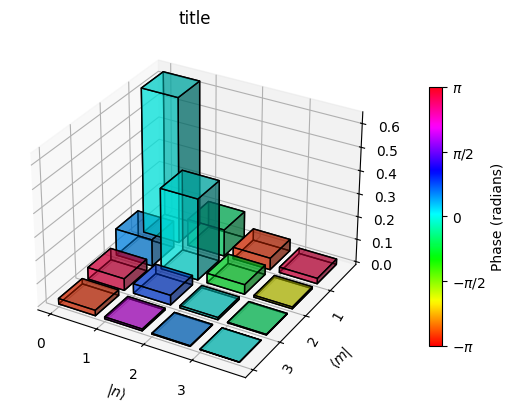

In [8]:
# plot density matirx
plot_density_matrix_bar_diagram(rho)

## compute theoretically - pure state

In [9]:
# for pure state, we can compute moment by ket directly
ket_state = (Ket(0) + 2j*Ket(1) + Ket(2)) / sqrt(6)
ket_state

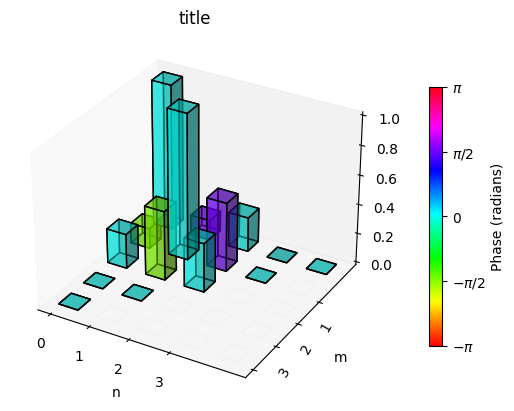

In [10]:
# compute moment for a given ket state
moments = eva_qubit_moments_by_ket(ket_state, highest_order=4)
plot_moments_bar_diagram(moments)

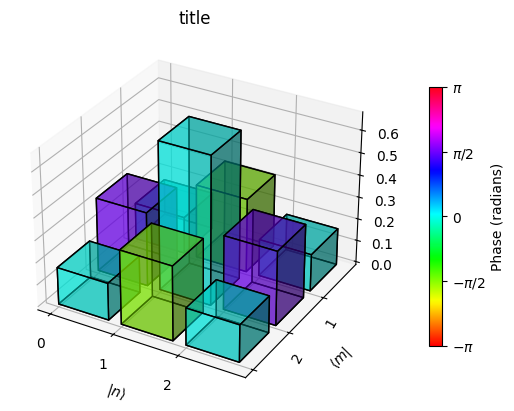

In [11]:
# use Maxima Likelihood Estimation to fit density matrix
rho_fit = mle_density_matrix(moments, dim=3, highest_order=4)
plot_density_matrix_bar_diagram(rho_fit)

WLN: 0.3430528466385861


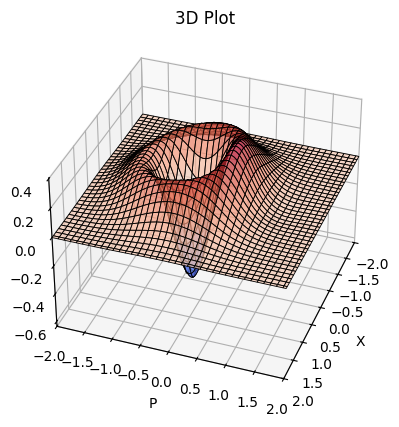

In [12]:
# Construct winger function from given moments
lambd = generate_complex_2dcoord(5, 51)
W = get_winger_function_func(moments, lambd, highest_order=4)
alpha = generate_complex_2dcoord(2, 151)
W_values = W(alpha)

# Winger Log Negativity
wln = np.log(approx_complex_2dint(np.abs(W_values), alpha)) 
print('WLN:', wln)

# plot
plot_complex_2dfunc_in3d(
    W_values, alpha,
    elev=35, 
    azim=20
)

## compute theoretically - mixed state

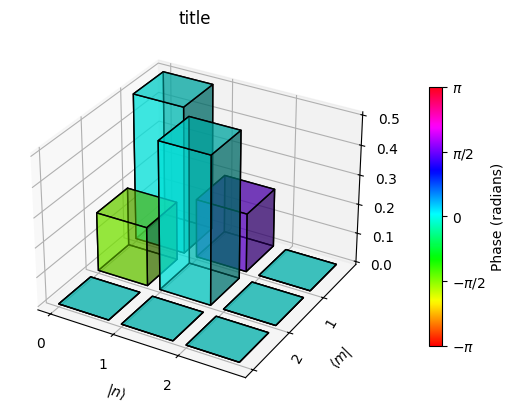

⎡ 0.5    0.2⋅ⅈ  0⎤
⎢                ⎥
⎢-0.2⋅ⅈ   0.5   0⎥
⎢                ⎥
⎣  0       0    0⎦

In [13]:
# for mixed state, we compute density matirx first then others
ket_states = [
    (Ket(0) + i*Ket(1)) / sqrt(2), 
    (Ket(0) - i*Ket(1)) / sqrt(2)
]
prob = [0.3, 0.7]
rho = eva_density_matrix_by_kets(ket_states, prob, dim=3)
plot_density_matrix_bar_diagram(rho)
rho

WLN: -0.0032741420602485057


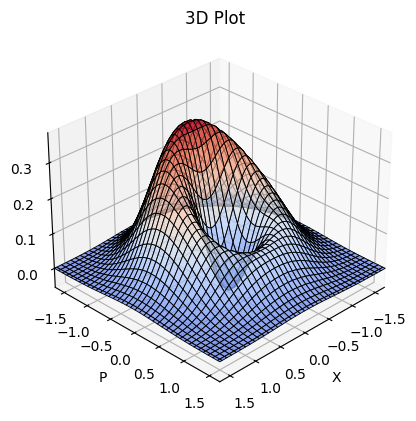

In [14]:
# compute moment for a given density matrix
moments = eva_qubit_moments_by_rho(rho)

# Construct winger function from given moments
lambd = generate_complex_2dcoord(5, 51)
W = get_winger_function_func(moments, lambd, highest_order=4)
alpha = generate_complex_2dcoord(1.7, 151)
W_values = W(alpha)

# Winger Log Negativity
wln = np.log(approx_complex_2dint(np.abs(W_values), alpha)) 
print('WLN:', wln)

# plot
plot_complex_2dfunc_in3d(W_values, alpha)

In [15]:
# fidelity
rho_max_coherent_state = np.array([
    [ 0.5,  0.5j,  0],
    [-0.5j, 0.5,   0],
    [   0,    0,   0],
])
compute_fidelity(rho, rho_max_coherent_state)

## additional useful symbolic computation

In [16]:
# a (annihilation operator) and adag are defined, you can import to use it
ket_state = (Ket(0) + i*Ket(1) + Ket(2)) / sqrt(3)
expr = adag * a * ket_state
expr

In [17]:
# `eva_fock_basis_expr` computes, need to notice dimension
result = eva_fock_basis_expr(expr, dim=3)
result

In [18]:
expr2 = abs(Bra(1) * result)**2
expr2

In [19]:
eva_fock_basis_expr(expr2)

In [20]:
# for user want to see moment of S = a + h†
eva_S_moment_intermsof_ah(2, 1)

In [21]:
# for user want to see qubit moment in terms of S and h
moments_intermsof_sh = eva_qubit_moments_intermsof_sh(highest_order=3)
moments_intermsof_sh['a12']